## Task Step 1 - Install Quandl library

In [1]:
import quandl
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import statsmodels.api as sm 
import os
import warnings 

warnings.filterwarnings("ignore") # Disable deprecation warnings that could indicate, for instance, a suspended library or 
# feature. These are more relevant to developers and very seldom to analysts.

plt.style.use('fivethirtyeight') 

## Task Step 2 - Find & Import Data Set

In [2]:
# Configure API key
quandl.ApiConfig.api_key = 'gf9ys4JNg95endBKFJdE'

In [5]:
# Importing Real Potential Gross Domestic Product - this is the "quarterly value" calculation posted by Federal Reserve Economic Data
# Note - I attempted to find a Real Estate data set relevant to my project, but to no avail.

data = quandl.get('FRED/GDPPOT')

In [6]:
data.head()

,Value
Date,
1949-01-01,2102.982630
1949-04-01,2130.581305
1949-07-01,2159.340530
1949-10-01,2186.844859
1950-01-01,2216.058359


In [7]:
data.shape

(332, 1)

In [8]:
data.columns

Index(['Value'], dtype='object')

## Task Step 3 - Subset of data

I chose not to take a subset of this data, to see the information back to the late 40s. 

## Task Step 4 - Create a linechart

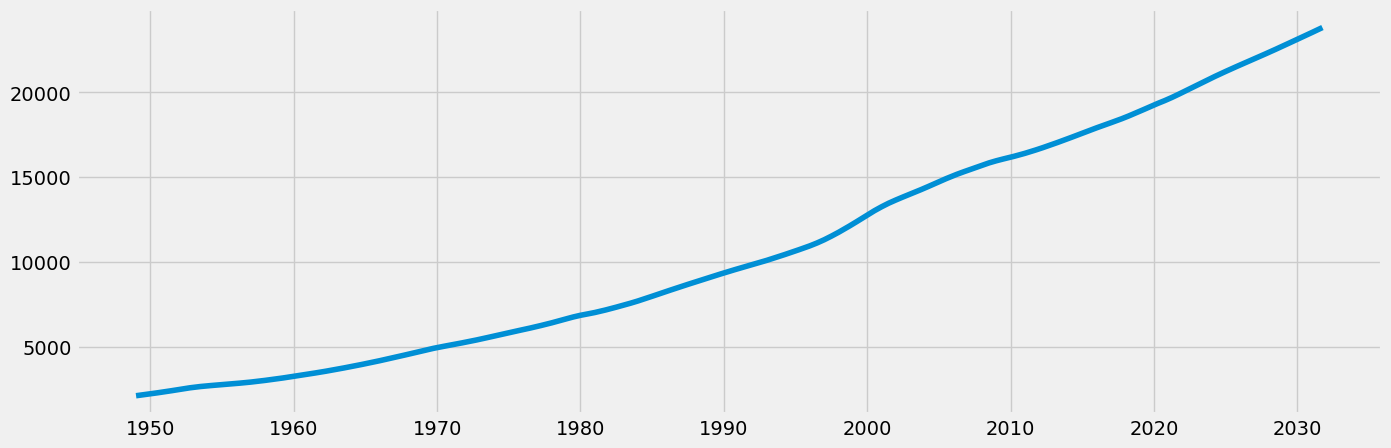

In [9]:
# Plot the data using matplotlib.

plt.figure(figsize=(15,5), dpi=100) 

plt.plot(data)

## Task Step 5 - Decompose data components

In [10]:
# Decompose time series using additive model
decomposition = sm.tsa.seasonal_decompose(data, model='additive')

In [11]:
# Define fixed size for all charts
from pylab import rcParams 
rcParams['figure.figsize'] = 18, 7

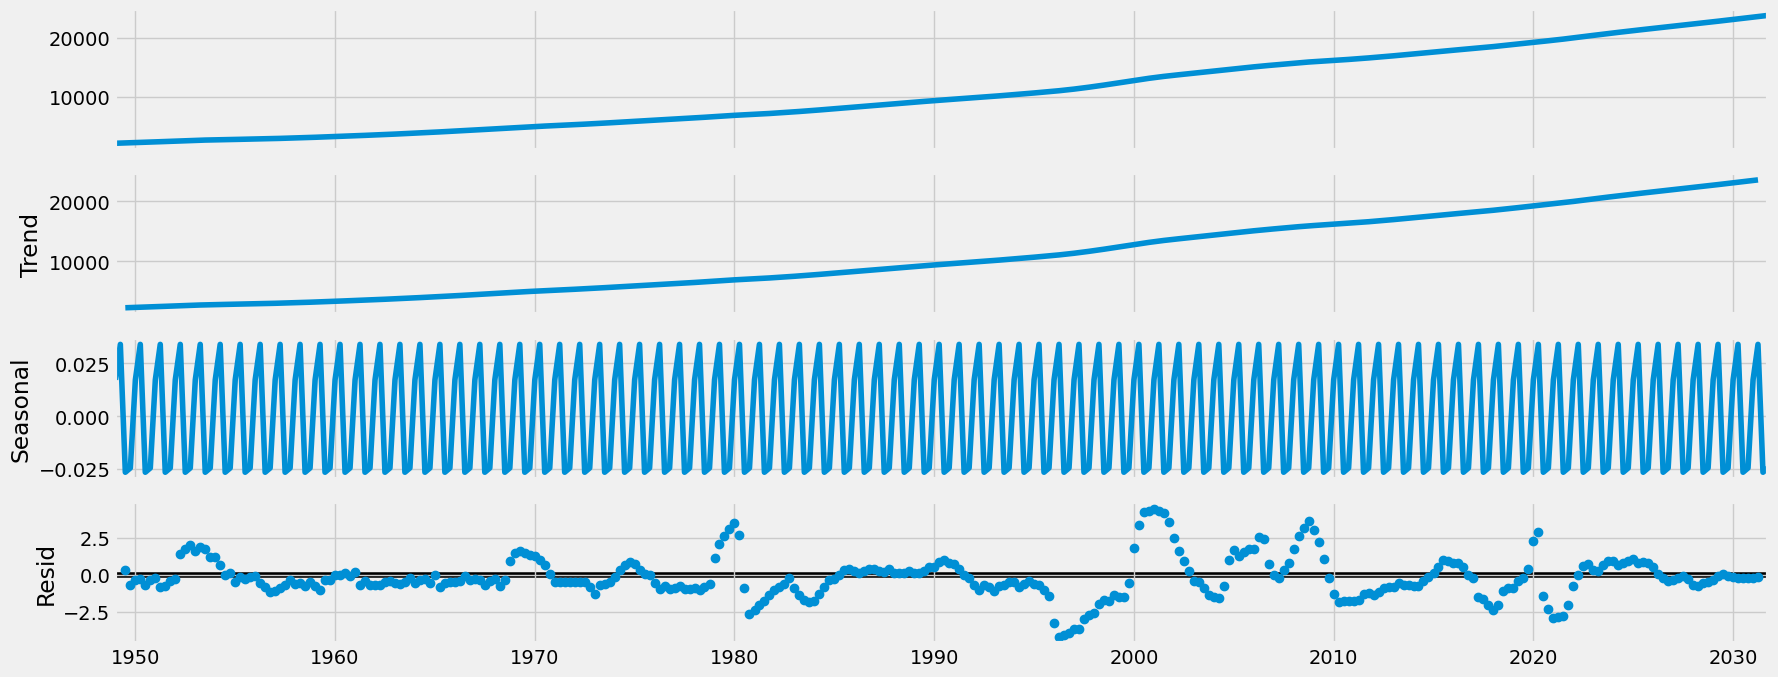

In [12]:
# Plot separate components

decomposition.plot()
plt.show()

There is a upward linear trend in the Real Potential Gross Domestic Product data, which appears similar to the level as this data did not require smoothing. We can also see from the decomposition that there is somehwat a seasonality present in this data, represented by the spiked curve that changes at regular intervals. Finally, the residual chart shows the noise of the data. 

## Task Step 6 - Dickey-Fuller test

In [13]:
# Import the adfuller() function
from statsmodels.tsa.stattools import adfuller 

# Define the function
def dickey_fuller(timeseries): 
    
    # Perform the Dickey-Fuller test:
    print ('Dickey-Fuller Stationarity test:')
    test = adfuller(timeseries, autolag='AIC')
    result = pd.Series(test[0:4], index=['Test Statistic','p-value','Number of Lags Used','Number of Observations Used'])
    for key,value in test[4].items():
       result['Critical Value (%s)'%key] = value
    print (result)

# Apply the test using the function on the time series
dickey_fuller(data['Value'])

Dickey-Fuller Stationarity test:
Test Statistic                   2.022994
p-value                          0.998702
Number of Lags Used              5.000000
Number of Observations Used    326.000000
Critical Value (1%)             -3.450569
Critical Value (5%)             -2.870447
Critical Value (10%)            -2.571515
dtype: float64


The test statistic is larger than the critical value, so we must stationarize the data.

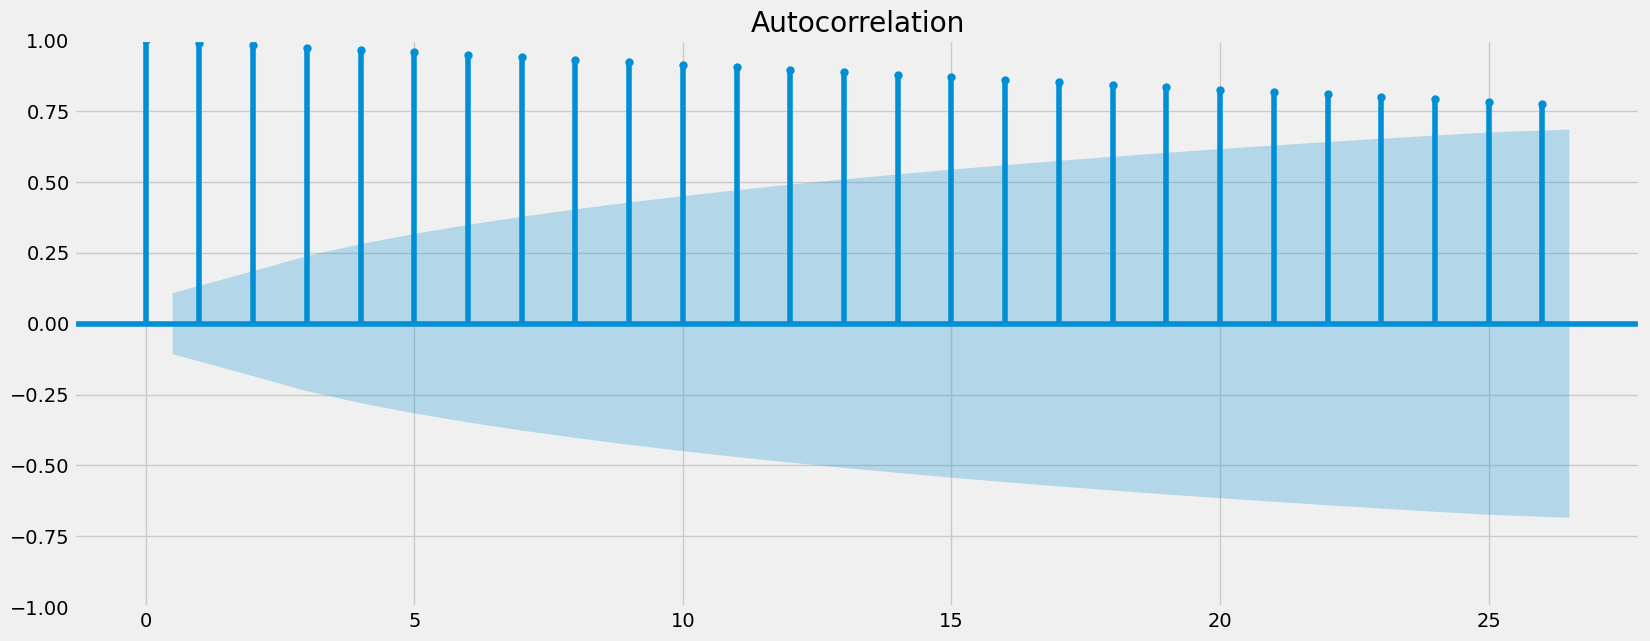

In [14]:
# Check out a plot of autocorrelations

from statsmodels.graphics.tsaplots import plot_acf, plot_pacf 
plot_acf(data)
plt.show()

There are many lags above the confidence interval edge, which means there are many lags significantly correlated with each other (or there is a lot of autocorrelated data, supporting the result of the Dickey-Fuller test)

## Task Step 7 - Round of differencing

In [15]:
data_diff = data - data.shift(1) 

In [16]:
# Remove missing values that come as a result of differencing
data_diff.dropna(inplace = True)

In [17]:
data_diff.head()

,Value
Date,
1949-04-01,27.598675
1949-07-01,28.759225
1949-10-01,27.504329
1950-01-01,29.213500
1950-04-01,29.423311


In [18]:
data_diff.columns

Index(['Value'], dtype='object')

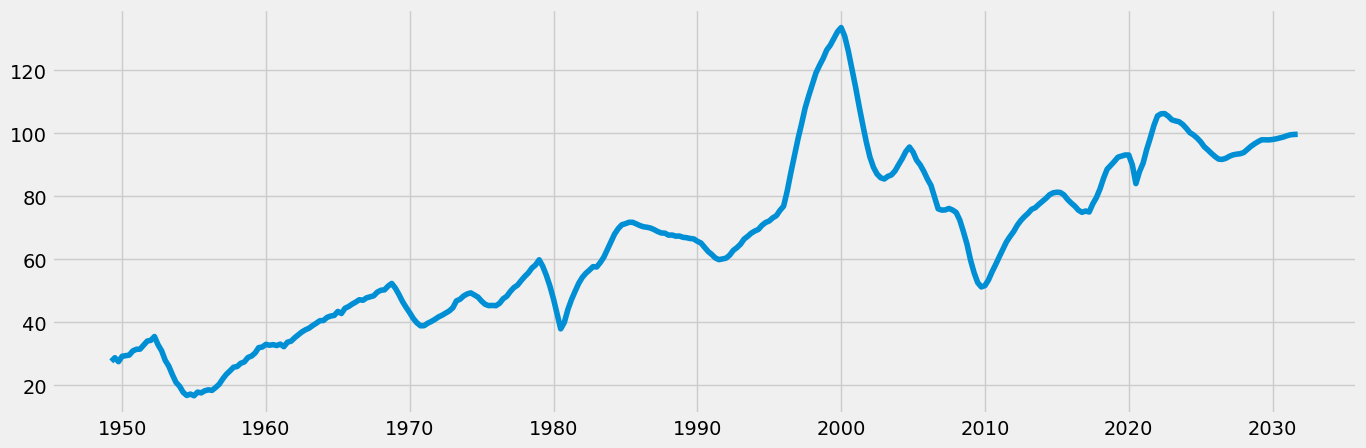

In [19]:
# Check out what the differencing did to the time-series curve

plt.figure(figsize=(15,5), dpi=100)
plt.plot(data_diff)

In [20]:
#Re-run Dickey-Fuller test
dickey_fuller(data_diff)

Dickey-Fuller Stationarity test:
Test Statistic                  -1.620261
p-value                          0.472593
Number of Lags Used              4.000000
Number of Observations Used    326.000000
Critical Value (1%)             -3.450569
Critical Value (5%)             -2.870447
Critical Value (10%)            -2.571515
dtype: float64


Test statistic is now smaller than both the 5% and 10% Critical Values

## Task Step 8 - Additional differencing - N/A

## Task Step 9 - Autocorrelations

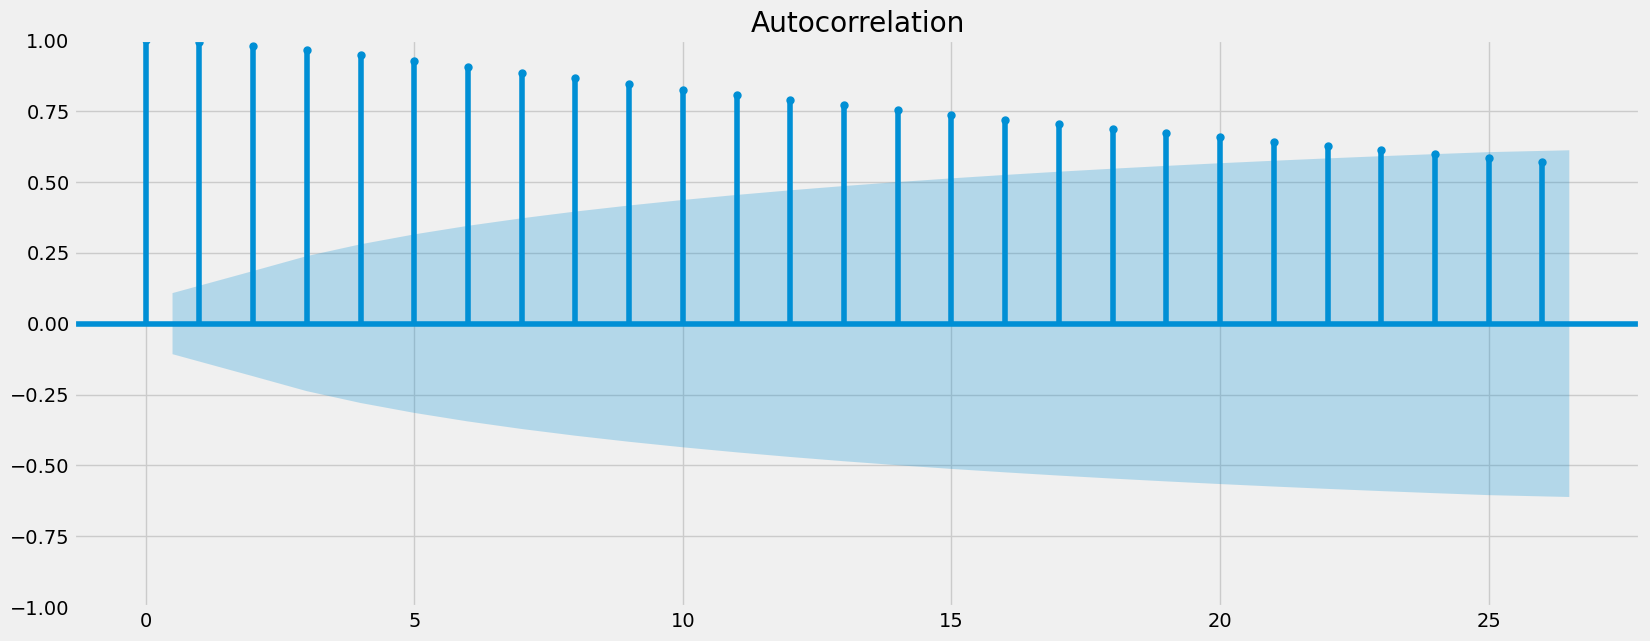

In [21]:
plot_acf(data_diff)
plt.show()